In [7]:
!pip install --upgrade pip -q
!pip install stumpy -q

In [85]:
import stumpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# FInd Patterns Inside Time-Series

In [86]:
steam_df = pd.read_csv("https://zenodo.org/record/4273921/files/STUMPY_Basics_steamgen.csv?download=1")
steam_df.head()

,drum pressure,excess oxygen,water level,steam flow
0,320.08239,2.506774,0.032701,9.302970
1,321.71099,2.545908,0.284799,9.662621
2,320.91331,2.360562,0.203652,10.990955
3,325.00252,0.027054,0.326187,12.430107
4,326.65276,0.285649,0.753776,13.681666


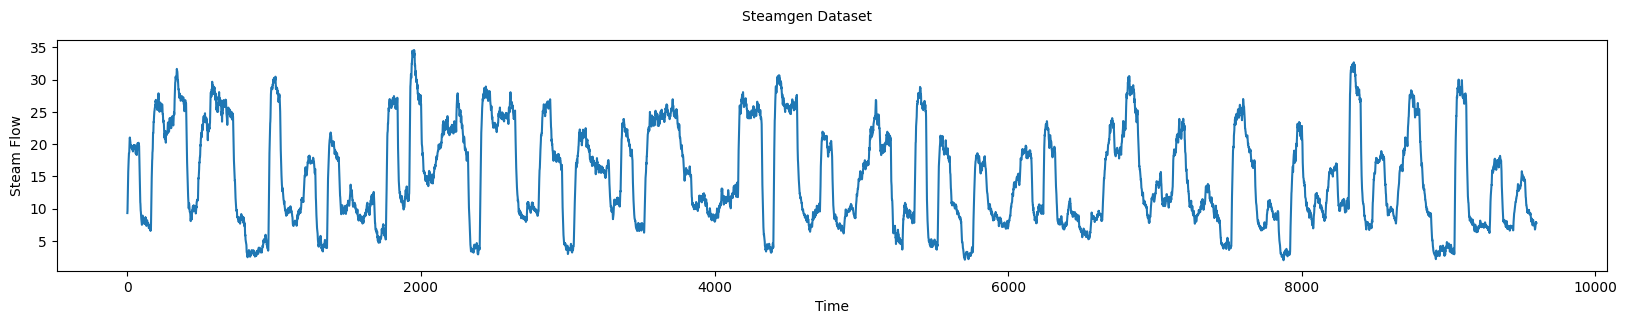

In [87]:
plt.rcParams["figure.figsize"]= 20, 3

plt.suptitle('Steamgen Dataset', fontsize='10')
plt.xlabel('Time', fontsize ='10')
plt.ylabel('Steam Flow', fontsize='10')
plt.plot(steam_df['steam flow'].values)
plt.show()

In [88]:
m = 640
matrix_profile = stumpy.stump(steam_df['steam flow'], m)

In [89]:
matrix_profile

array([[16.235411477247844, 2242, -1, 2242],
       [16.081918663230635, 2243, -1, 2243],
       [15.909403017873462, 2245, -1, 2245],
       ...,
       [9.022931372214867, 877, 877, -1],
       [9.0382596759492, 878, 878, -1],
       [9.054692514421166, 879, 879, -1]], dtype=object)

643 5.491619827769537
8724 5.491619827769537


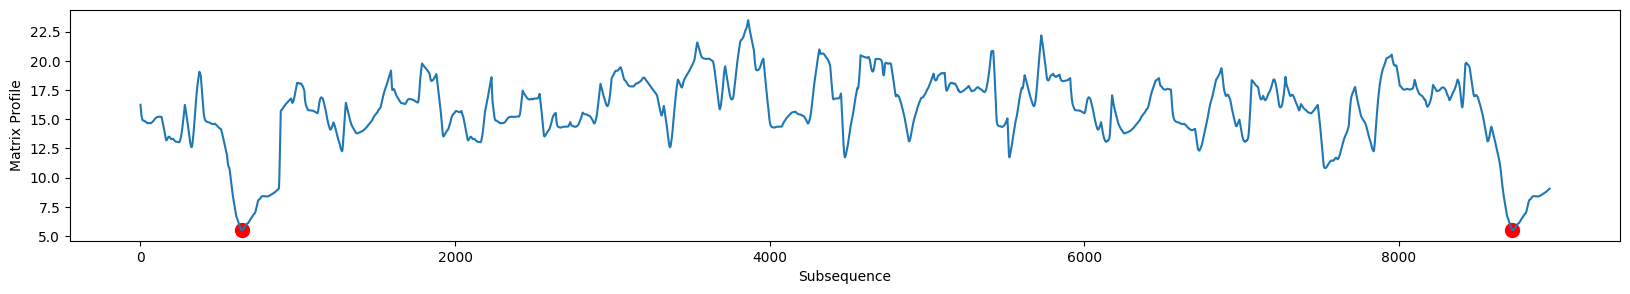

In [91]:
#motif_index = matrix_profile[:, 0].argmin()
motif_indices = np.argsort(matrix_profile[:, 0])[:2]

plt.xlabel('Subsequence')
plt.ylabel('Matrix Profile')

for motif_index in motif_indices:
    print(motif_index, matrix_profile[motif_index, 0])
    plt.scatter(motif_index,
                matrix_profile[motif_index, 0],
                c='red',
                s=100)

plt.plot(matrix_profile[:,0])

plt.show()

## Matched Patterns Inside Time-Series

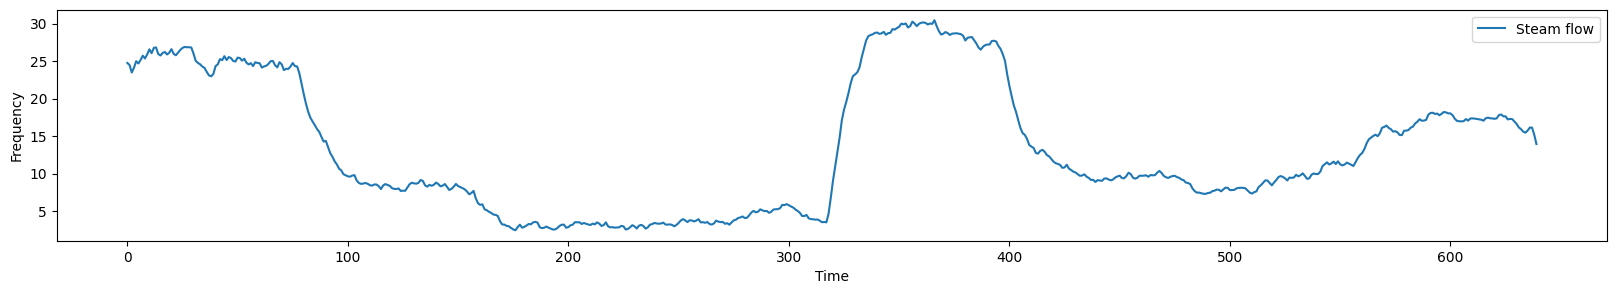

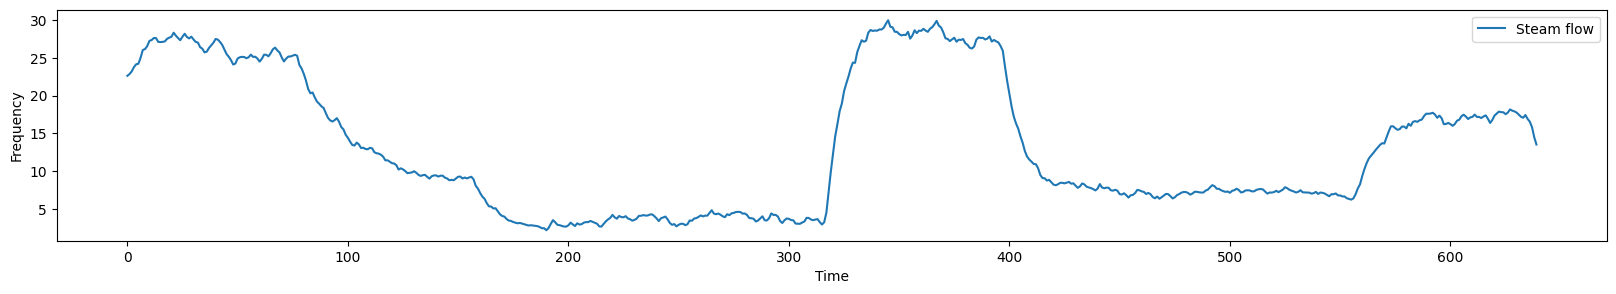

In [92]:
for motif_index in motif_indices:

    plt.plot(steam_df.iloc[motif_index : motif_index + m]['steam flow'].values, label='Steam flow')

    plt.xlabel('Time')
    plt.ylabel('Frequency')

    plt.legend()

    plt.show()

# Find A Given Pattern Inside Time-Series

In [93]:
pattern = steam_df.iloc[motif_indices[0] : motif_indices[0] + m]['steam flow']

In [94]:
pattern_matrix_profile = stumpy.stump(T_A = steam_df['steam flow'],
                        m = m,
                        T_B = pattern,
                        ignore_trivial = False)

motif_indices = np.argsort(pattern_matrix_profile[:, 0])[:2]

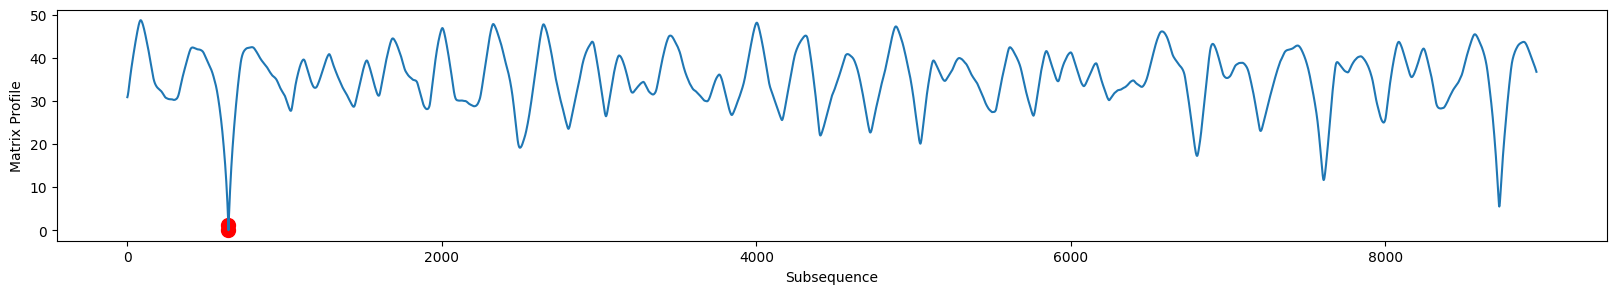

In [95]:
plt.xlabel('Subsequence')
plt.ylabel('Matrix Profile')

for motif_index in motif_indices:
    plt.scatter(motif_index,
                pattern_matrix_profile[motif_index, 0],
                c='red',
                s=100)

    
plt.plot(pattern_matrix_profile[:,0])

plt.show()

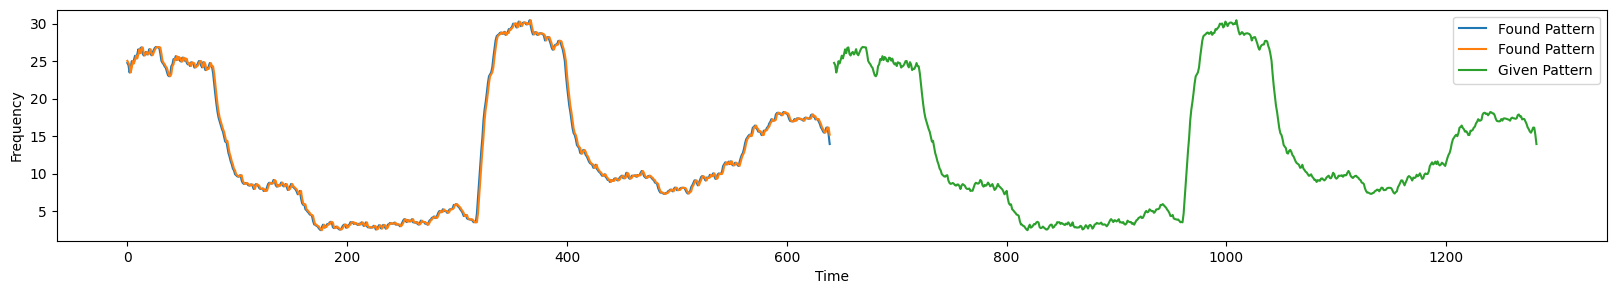

In [96]:
for motif_index in motif_indices:

    plt.plot(steam_df.iloc[motif_index : motif_index + m]['steam flow'].values, label='Found Pattern')

    plt.xlabel('Time')
    plt.ylabel('Frequency')

plt.plot(pattern, label='Given Pattern')
plt.legend()
plt.show()


# Find Overlapping Of Time-Series

In [98]:
queen_df = pd.read_csv("https://zenodo.org/record/4294912/files/queen.csv?download=1")
vanilla_ice_df = pd.read_csv("https://zenodo.org/record/4294912/files/vanilla_ice.csv?download=1")

print("Length of Queen dataset : " , queen_df.size)
print("Length of Vanilla ice dataset : " , vanilla_ice_df.size)

Length of Queen dataset :  24289
Length of Vanilla ice dataset :  23095


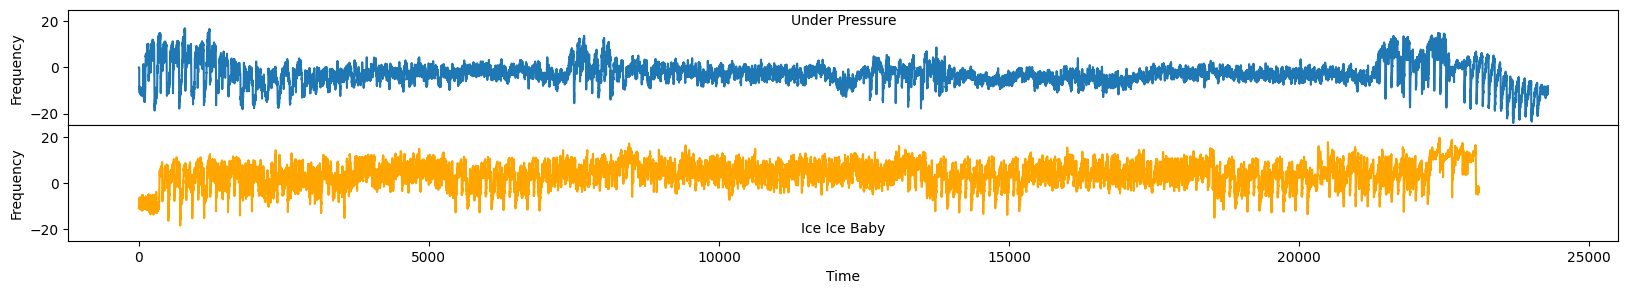

In [101]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})

axs[0].set_title('Under Pressure', fontsize=10, y=0.8)
axs[1].set_title('Ice Ice Baby',  fontsize=10, y=0)

axs[1].set_xlabel('Time')

axs[0].set_ylabel('Frequency')
axs[1].set_ylabel('Frequency')

ylim_lower = -25
ylim_upper = 25
axs[0].set_ylim(ylim_lower, ylim_upper)
axs[1].set_ylim(ylim_lower, ylim_upper)

axs[0].plot(queen_df['under_pressure'])
axs[1].plot(vanilla_ice_df['ice_ice_baby'], c='orange')

plt.show()

## Performing an AB-Join with STUMPY 

In [102]:
m = 500
queen_mp = stumpy.stump(T_A = queen_df['under_pressure'],
                        m = m,
                        T_B = vanilla_ice_df['ice_ice_baby'],
                        ignore_trivial = False)


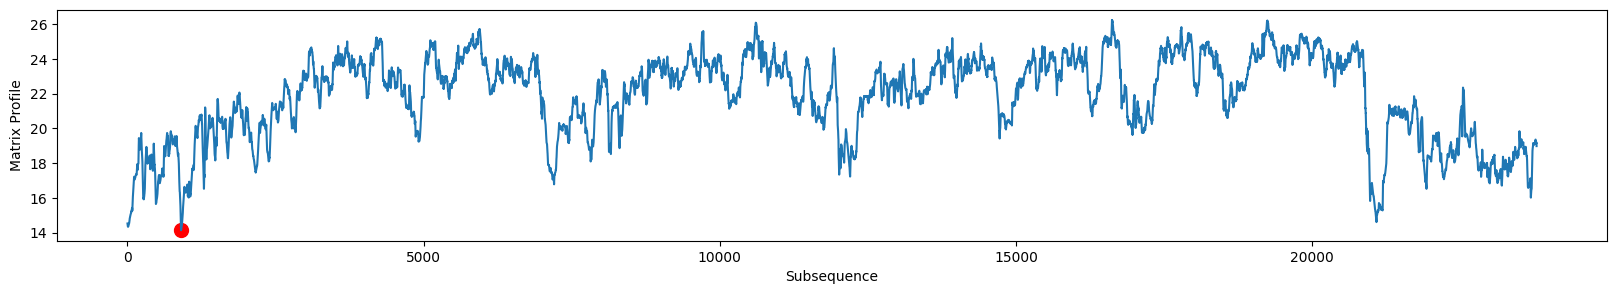

In [109]:
queen_motif_index = queen_mp[:, 0].argmin()
vanilla_ice_motif_index = queen_mp[queen_motif_index, 1]

plt.xlabel('Subsequence')
plt.ylabel('Matrix Profile')

plt.scatter(queen_motif_index,
               queen_mp[queen_motif_index, 0],
               c='red',
               s=100)

plt.plot(queen_mp[:,0])

plt.show()

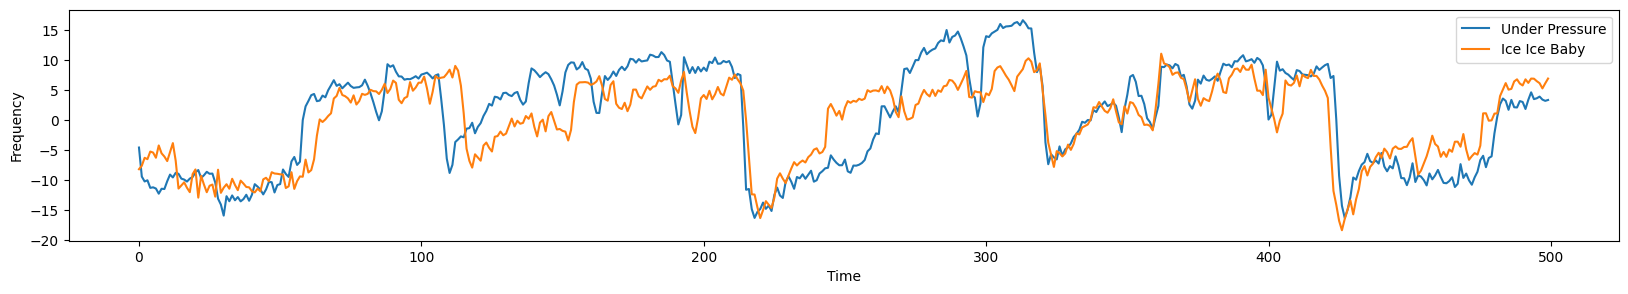

In [105]:
plt.plot(queen_df.iloc[queen_motif_index : queen_motif_index + m].values, label='Under Pressure')
plt.plot(vanilla_ice_df.iloc[vanilla_ice_motif_index:vanilla_ice_motif_index+m].values, label='Ice Ice Baby')

plt.xlabel('Time')
plt.ylabel('Frequency')

plt.legend()

plt.show()